In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


170500096/170498071 [==============================] - 11s 0us/step


In [3]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

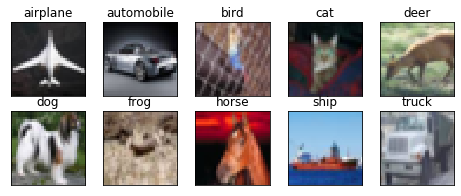

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
test_features.shape

(10000, 32, 32, 3)

In [9]:
# Define the model
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3) ))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3,))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3,border_mode='same' ))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3, ))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Convolution2D(128, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3, ))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, 1, 1, activation='relu',kernel_regularizer=l2(0.01)))

model.add(Convolution2D(10,(4, 4)))

model.add(Flatten())

model.add(Activation('softmax'))
# model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=30)`
  del sys.path[0]




Epoch 1/30
390/390 [==============================] - 26s 68ms/step - loss: 1.6086 - acc: 0.5020 - val_loss: 1.3467 - val_acc: 0.5630
Epoch 2/30
390/390 [==============================] - 19s 50ms/step - loss: 1.0575 - acc: 0.6522 - val_loss: 1.4991 - val_acc: 0.5277
Epoch 3/30
390/390 [==============================] - 20s 50ms/step - loss: 0.8625 - acc: 0.7145 - val_loss: 0.9524 - val_acc: 0.6841
Epoch 4/30
390/390 [==============================] - 20s 50ms/step - loss: 0.7599 - acc: 0.7478 - val_loss: 0.7471 - val_acc: 0.7531
Epoch 5/30
390/390 [==============================] - 19s 50ms/step - loss: 0.6909 - acc: 0.7692 - val_loss: 0.7771 - val_acc: 0.7509
Epoch 6/30
390/390 [==============================] - 20s 50ms/step - loss: 0.6426 - acc: 0.7882 - val_loss: 0.7925 - val_acc: 0.7499
Epoch 7/30
390/390 [==============================] - 19s 50ms/step - loss: 0.5934 - acc: 0.8040 - val_loss: 0.8695 - val_acc: 0.7284
Epoch 8/30
390/390 [==============================] - 20s 50

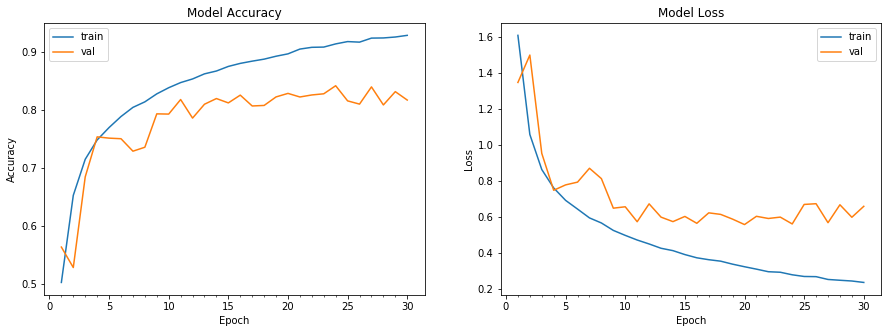

Accuracy on test data is: 81.66


In [11]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [12]:
model.evaluate(test_features,test_labels)

10000/10000 [==============================] - 2s 220us/step


[0.6579598718166352, 0.8166]

In [0]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
from cv2 import imshow

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


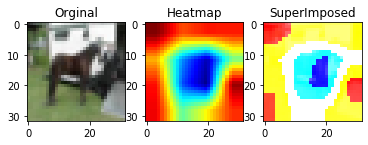

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


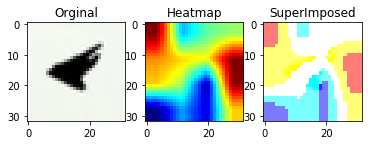

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


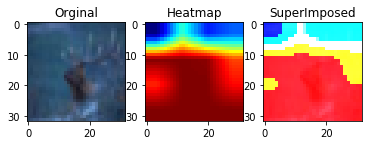

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


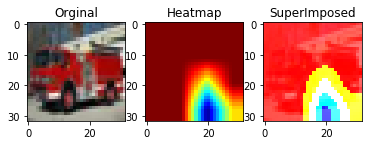

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


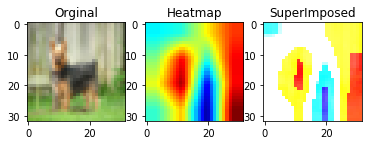

In [14]:

def gradcam():

    c = 20
    for j in range(20,25):
      
      img = test_features[j]
      img_t = image.img_to_array(img)
      img_t = np.expand_dims(img_t, axis=0)
      img_t = img_t / img_t.mean()  
  
      preds = model.predict(img_t)
      class_idx = np.argmax(preds[0])
      class_output = model.output[:, class_idx]
      last_conv_layer = model.get_layer("conv2d_7")  
  
      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))

      iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([img_t])
  
      for i in range(32):
          conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
  
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
      superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0, dtype=cv2.CV_32F)
      
      plt.subplot(1, 3, 1)
      plt.imshow(test_features[c])
      plt.title('Orginal')
      
      plt.subplot(1, 3, 2)
      plt.imshow(heatmap)
      plt.title('Heatmap')
      
      
      plt.subplot(1, 3, 3)
      plt.imshow(superimposed_img)
      plt.title('SuperImposed')
      c += 1
      plt.show()
      
      
gradcam()

# GradCam on Single Image. 

In [0]:
test_images=test_features[4]
x = np.expand_dims(test_images, axis=0)
# x = preprocess_input(x)


In [0]:
preds=model.predict(x)
class_idx = np.argmax(preds)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_7")

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(32):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

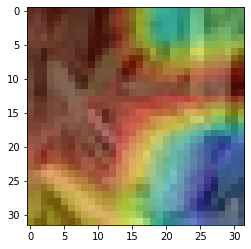

In [19]:

# img = cv2.imread(test_images)

heatmap = cv2.resize(heatmap, (test_images.shape[0], test_images.shape[1]))
heatmap = np.uint8(255 * heatmap)
test_images=np.uint8(test_images*255)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(test_images, 0.6, heatmap, 0.4, 0)
# cv2.imshow("Original", test_images)
# cv2.imshow("GradCam", superimposed_img)
# cv2.waitKey(0)

plt.imshow(superimposed_img)


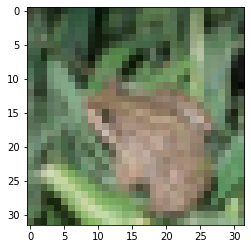

In [20]:
plt.imshow(test_images)

# After cutout

In [0]:

def get_random_eraser(p=0.5, s_l=0.05, s_h=0.5, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
  2/390 [..............................] - ETA: 31s - loss: 0.4080 - acc: 0.8711

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=30)`
  del sys.path[0]


390/390 [==============================] - 20s 51ms/step - loss: 0.4984 - acc: 0.8340 - val_loss: 0.5556 - val_acc: 0.8331
Epoch 2/30
390/390 [==============================] - 19s 48ms/step - loss: 0.4996 - acc: 0.8316 - val_loss: 0.5601 - val_acc: 0.8278
Epoch 3/30
390/390 [==============================] - 19s 48ms/step - loss: 0.4805 - acc: 0.8401 - val_loss: 0.7040 - val_acc: 0.8021
Epoch 4/30
390/390 [==============================] - 19s 48ms/step - loss: 0.4794 - acc: 0.8415 - val_loss: 0.5392 - val_acc: 0.8370
Epoch 5/30
390/390 [==============================] - 18s 47ms/step - loss: 0.4785 - acc: 0.8423 - val_loss: 0.6490 - val_acc: 0.8118
Epoch 6/30
390/390 [==============================] - 19s 48ms/step - loss: 0.4725 - acc: 0.8425 - val_loss: 0.5514 - val_acc: 0.8334
Epoch 7/30
390/390 [==============================] - 18s 47ms/step - loss: 0.4652 - acc: 0.8452 - val_loss: 0.5802 - val_acc: 0.8328
Epoch 8/30
390/390 [==============================] - 18s 47ms/step - los

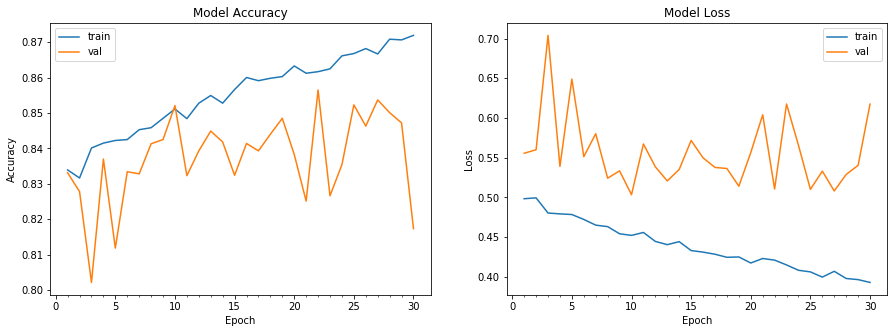

Accuracy on test data is: 81.73


In [27]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,preprocessing_function=get_random_eraser(p=0.7,v_l=0, v_h=1,pixel_level=True))


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 30, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 )
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


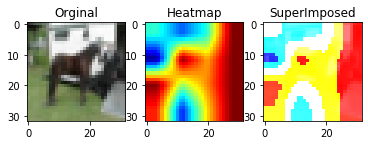

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


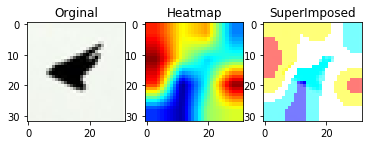

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


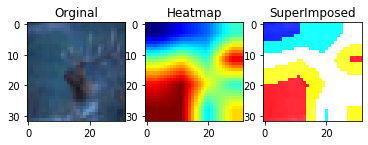

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


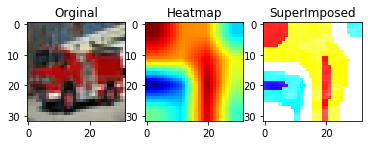

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


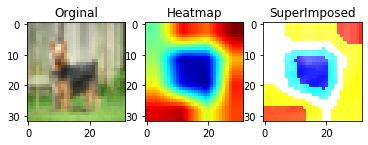

In [28]:

def gradcam():

    c = 20
    for j in range(20,25):
      
      img = test_features[j]
      img_t = image.img_to_array(img)
      img_t = np.expand_dims(img_t, axis=0)
      img_t = img_t / img_t.mean()  
  
      preds = model.predict(img_t)
      class_idx = np.argmax(preds[0])
      class_output = model.output[:, class_idx]
      last_conv_layer = model.get_layer("conv2d_7")  
  
      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))

      iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([img_t])
  
      for i in range(32):
          conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
  
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
      superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0, dtype=cv2.CV_32F)
      
      plt.subplot(1, 3, 1)
      plt.imshow(test_features[c])
      plt.title('Orginal')
      
      plt.subplot(1, 3, 2)
      plt.imshow(heatmap)
      plt.title('Heatmap')
      
      
      plt.subplot(1, 3, 3)
      plt.imshow(superimposed_img)
      plt.title('SuperImposed')
      c += 1
      plt.show()
      
      
gradcam()